In [1]:

import numpy as np
import pandas as pd
import os
import argparse
from tqdm import tqdm


def check_file(file_path):
    data = np.load(file_path, allow_pickle=True)
    print(f"{data['param_names']}")
    print(f"{data['hitsE'].shape}")
    print(f"{data['hitsM'].shape}")
    print(f"{data['params'].shape}")

def merge_batch_files(batch_files, output_npz, param_names):
    
    """合并所有批次文件"""
    all_hitsE = []
    all_hitsM = []
    all_params = []

    for batch_file in tqdm(batch_files):
        data = np.load(batch_file, allow_pickle=True)
        all_hitsE.extend(data["hitsE"])
        all_hitsM.extend(data["hitsM"])
        all_params.extend(data["params"])
        del data
        # os.remove(batch_file)

    np.savez_compressed(output_npz,
                        hitsE=np.array(all_hitsE, dtype=object),
                        hitsM=np.array(all_hitsM, dtype=object),
                        params=np.array(all_params, dtype=object),
                        param_names=param_names)
    print(f"Merge {len(batch_files)} files to {output_npz}")
if __name__ == "__main__":
    selected_param_names = ["label", "weight",
                            "R_ue", "R_mean", "Eage", "compactness", "pincness","rho40",
                            "recE", "rec_x", "rec_y", "rec_theta", "rec_phi", 
                            "NpE3", "NuM1","NuM2","NuM3","NuM4","NuM5", 
                            "trueE", "core_x","core_y","theta","phi",
                            "dr","NuW3","NuW2", "mjd","tlong","tlat",
                            ]

    # Dir="/home/zhonghua/data/Dataset_Filted/Experiment/exp_muons"
    # npz_name="2023_0101_1e10_V04_dataset_muon.npz"
    # batch_files = []
    # gap=100000
    # # nentries=2967854
    # nentries_1=2500000
    # nentries_2=2967854
    # for n in range(nentries_1,nentries_2,gap):
    #     batch_start=n
    #     batch_end=min(n+gap,nentries_2)
    #     batch_files.append(f"{Dir}/{npz_name}_batch_{batch_start}_{batch_end-1}.npz")


    # batch_files=[f"{Dir}/{npz_name}_{n}.npz" for n in range(1,5)]
    # print(f"Merging batch {len(batch_files)} files...")
    # merge_batch_files(batch_files, f"{Dir}/{npz_name}.npz", selected_param_names)
    # check_file(batch_files[0])
    def npz_to_df_csv(npz_file):
        data = np.load(npz_file, allow_pickle=True)
        df = pd.DataFrame(data['params'], columns=data['param_names'])
        df.to_csv(npz_file.replace(".npz", ".csv"), index=False)
        print(df.head())

    npz_file="/home/zhonghua/data/Dataset_Filted/Experiment/Rue1less_minus2/2024_Rue_minus1.9_noAge_cut_1e10_V04_dataset_fastcode.npz"
    npz_to_df_csv(npz_file)


  label weight      R_ue     R_mean      Eage compactness  pincness  \
0    -1      1 -2.297761  31.258905  1.222427    0.207876      0.75   
1    -1      1 -1.982694   30.23247  1.090768    0.512289  0.814433   
2    -1      1 -1.960197  41.423206  1.242226    0.439977  0.822222   
3    -1      1 -1.931882  15.561516  1.178169    0.312007  0.865248   
4    -1      1 -1.933325   38.34079  1.067199    0.507954  0.863248   

       rho40      recE       rec_x  ... core_x core_y theta phi          dr  \
0  85.181083  1.881317   82.571793  ...   -1.0   -1.0  -1.0  -1   16.365608   
1  64.371988  1.958587    91.15966  ...   -1.0   -1.0  -1.0  -1   56.522633   
2  60.752809  1.914586 -314.057526  ...   -1.0   -1.0  -1.0  -1   48.645046   
3  88.123811  2.266014 -232.256683  ...   -1.0   -1.0  -1.0  -1   54.081314   
4  66.747631  1.900079  239.375366  ...   -1.0   -1.0  -1.0  -1  126.051071   

       NuW3      NuW2           mjd       tlong       tlat  
0  1.972463  2.126267  60309.666666  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

exp_Rue2_2_file="/home/zhonghua/data/Dataset_Filted/Experiment/exp_Rue2_2/2023_1e10_V04_Rue2_2_dataset_muon.csv"
exp_Rue2_2_df=pd.read_csv(exp_Rue2_2_file)
exp_Rue2_2_df.columns


Index(['label', 'weight', 'R_ue', 'R_mean', 'Eage', 'compactness', 'pincness',
       'rho40', 'recE', 'rec_x', 'rec_y', 'rec_theta', 'rec_phi', 'NpE3',
       'NuM1', 'NuM2', 'NuM3', 'NuM4', 'NuM5', 'trueE', 'core_x', 'core_y',
       'theta', 'phi', 'dr', 'NuW3', 'NuW2', 'mjd', 'tlong', 'tlat'],
      dtype='object')

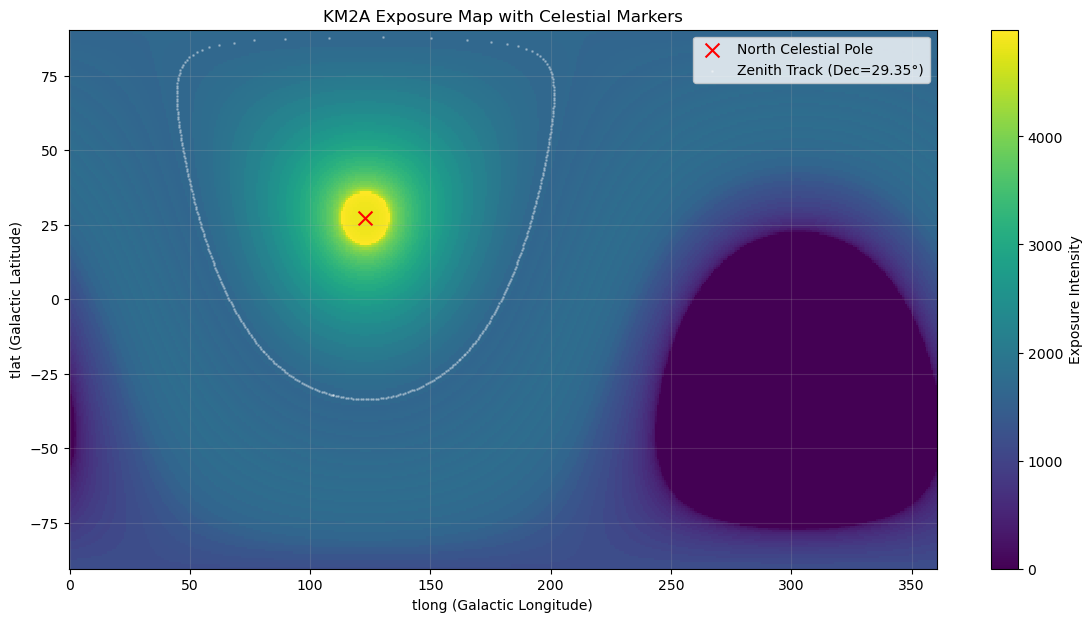

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
import uproot
from scipy.interpolate import interp1d

# --- 1. 加载数据 ---
file = uproot.open("/home/zhonghua/data/exposure_Gaisser.root")
h1 = file["h1"]
exposure_interp = interp1d(h1.axis().centers(), np.array(h1.values()), 
                           bounds_error=False, fill_value=0)

# --- 2. 坐标网格 ---
l_bins = np.linspace(0, 360, 500)
b_bins = np.linspace(-90, 90, 250)
L, B = np.meshgrid(l_bins, b_bins)

# 转换银道坐标到赤道坐标
gal_coords = SkyCoord(l=L*u.deg, b=B*u.deg, frame='galactic')
dec_rad = gal_coords.icrs.dec.radian

# --- 3. 计算曝光量 ---
lat_lhaaso = np.radians(29.35)
hour_angles = np.linspace(0, 2*np.pi, 144) 
cos_zenith = (np.sin(lat_lhaaso) * np.sin(dec_rad[:, :, np.newaxis]) + 
              np.cos(lat_lhaaso) * np.cos(dec_rad[:, :, np.newaxis]) * np.cos(hour_angles))
zeniths = np.degrees(np.arccos(np.clip(cos_zenith, -1, 1)))
exposure_map = np.sum(exposure_interp(zeniths), axis=2) / len(hour_angles)

# --- 4. 定义关键参考点 ---
# A. 北天极 (NCP): RA=任何, Dec=90
ncp = SkyCoord(ra=0*u.deg, dec=90*u.deg, frame='icrs').galactic
# B. LHAASO 天顶轨迹 (Zenith Track): Dec = 29.35, RA 走一圈
ra_track = np.linspace(0, 360, 360) * u.deg
dec_track = np.full(360, 29.35) * u.deg
zenith_track = SkyCoord(ra=ra_track, dec=dec_track, frame='icrs').galactic

# --- 5. 绘图 ---
plt.figure(figsize=(14, 7))
im = plt.pcolormesh(L, B, exposure_map, cmap='viridis', shading='auto')
plt.colorbar(im, label='Exposure Intensity')

# 绘制北天极 NCP (那个可能的亮斑点)
plt.scatter(ncp.l.deg, ncp.b.deg, color='red', marker='x', s=100, label='North Celestial Pole')

# 绘制天顶轨迹 (LHAASO 正上方扫过的区域)
# 注意：由于轨迹可能跨越 0/360 度，用 scatter 避免连线乱跳
plt.scatter(zenith_track.l.deg, zenith_track.b.deg, color='white', s=1, alpha=0.3, label='Zenith Track (Dec=29.35°)')

plt.xlabel('tlong (Galactic Longitude)')
plt.ylabel('tlat (Galactic Latitude)')
plt.title('KM2A Exposure Map with Celestial Markers')
plt.legend(loc='upper right')
plt.grid(alpha=0.2)
plt.show()


In [ ]:
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

def give_bkg_mc_weights_gaisser(pr_df: pd.DataFrame):
    rootfile = "/home/zhonghua/data/exposure_Gaisser.root"
    with uproot.open(rootfile) as f:
        hWeight = f["hWeight"]
        edges_E = hWeight.axes[0].edges()  # Energy bin edges
        edges_Zen = hWeight.axes[1].edges()  # Zenith bin edges
        weights_2d = hWeight.values()

    def add_weights(trueE, rec_zenith, weights_2d):
        trueE=np.log10(trueE/1e3)
        rec_zenith=180/np.pi*rec_zenith
        bin_idx_E = np.digitize(trueE, edges_E) - 1
        bin_idx_Zen = np.digitize(rec_zenith, edges_Zen) - 1
        if bin_idx_E >= weights_2d.shape[0]:
            bin_idx_E = weights_2d.shape[0] - 1
        if bin_idx_Zen >= weights_2d.shape[1]:
            bin_idx_Zen = weights_2d.shape[1] - 1
        return weights_2d[bin_idx_E, bin_idx_Zen]
    
    pr_df['gaisser_weight']=pr_df.apply(lambda row: add_weights(row['trueE'],row['rec_theta'],weights_2d),axis=1)
    pr_df['gaisser_weight']=pr_df['gaisser_weight']/86400
    # print(f"======> Total expected background MC events after weighting: {pr_df['gaisser_weight'].sum()} ======")
    return pr_df

def load_pos(flag:int):
    ED_pos_file = None
    MD_pos_file = None
    script_dir = "/home/zhonghua/data/Dataset_Filted/config"
    if flag==7:
        ED_pos_file=f'{script_dir}/ED_pos_all_MC.txt'
        MD_pos_file=f'{script_dir}/MD_pos_all_MC.txt'
    else:
        MD_pos_file=f'{script_dir}/MD_pos_1188.txt'
        if flag>20191224 and flag<20201201:
            ED_pos_file=f'{script_dir}/ED_pos_half.txt'
        elif flag>20201130 and flag<20210720:
            ED_pos_file=f'{script_dir}/ED_pos_3978.txt'
        elif flag>20210719 and flag<20210807:
            ED_pos_file=f'{script_dir}/ED_pos_5216up_20210720.txt'
        elif flag>20210806 and flag<20210818:
            ED_pos_file=f'{script_dir}/ED_pos_5216up_20210807.txt'
        elif flag>20210817 and flag<20220525:
            ED_pos_file=f'{script_dir}/ED_pos_5216up_20210818.txt'
        elif flag>20220525 and flag<20220601:
            ED_pos_file=f'{script_dir}/ED_pos_5216up_20220520.txt'
        elif flag>20220531 and flag<20220705:
            ED_pos_file=f'{script_dir}/ED_pos_5216up_20220601.txt'
        elif flag>20220704:
            ED_pos_file=f'{script_dir}/ED_pos_5216up_20220705.txt'
    
    if ED_pos_file is not None:
        if os.path.exists(ED_pos_file) and os.path.exists(MD_pos_file):
            ED_pos=pd.read_csv(ED_pos_file,  sep=r'\s+',   skiprows=1,header=None, names=["id","x","y","z"])
            MD_pos=pd.read_csv(MD_pos_file,  sep=r'\s+',   skiprows=1,header=None, names=["id","x","y","z"])
            return ED_pos,MD_pos
    else:

        raise ValueError("wrong flag")
    
def event_plot_npz(index, hitsE_all, hitsM_all, df_params, flag=20240101, figpath=None):
    # 1. 加载阵列全量位置作为背景
    # 依然需要 load_pos 来获取该 flag 下所有探测器的坐标
    ED_pos, MD_pos = load_pos(flag)

    # 2. 提取当前事例的 hit 数据 (N, 5) -> x, y, r, pe, dt
    hE = hitsE_all[index]
    hM = hitsM_all[index]
    
    # 提取重建参数
    row = df_params.iloc[index]
    core = [row['rec_x'], row['rec_y']]
    theta, phi = row['rec_theta'], row['rec_phi']

    # 3. 计算指向箭头
    dy = np.sin(theta) * np.cos(phi)
    dx = -np.sin(theta) * np.sin(phi)
    dr = np.sqrt(dx**2 + dy**2)
    arrow_len = 200
    if dr > 0:
        dx, dy = dx * arrow_len / dr, dy * arrow_len / dr

    # 4. 开始绘图
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # --- 左图：ED Hits ---
    # 背景：所有 ED 位置
    ax1.scatter(ED_pos['x'], ED_pos['y'], c='lightgray', s=1, alpha=0.3, label='Detectors')
    # 前景：命中的 ED (hE[:, 3] 是 pe)
    sc1 = ax1.scatter(hE[:, 0], hE[:, 1], c=np.log10(hE[:, 3] + 1), 
                      cmap='viridis', s=5, zorder=3)
    
    ax1.scatter(core[0], core[1], c='red', s=60, marker='x', label='Core', zorder=5)
    ax1.arrow(core[0], core[1], dx, dy, color='orange', width=2, head_width=15, zorder=6)
    
    ax1.set_title('ED Channel Hits', fontweight='bold')
    fig.colorbar(sc1, ax=ax1, label='log10 PE')

    # --- 右图：MD Hits ---
    # 背景：所有 MD 位置
    ax2.scatter(MD_pos['x'], MD_pos['y'], c='lightgray', s=4, alpha=0.3)
    # 前景：命中的 MD
    sc2 = ax2.scatter(hM[:, 0], hM[:, 1], c=np.log10(hM[:, 3] + 1), 
                      cmap='viridis', s=15, zorder=3)
    
    ax2.scatter(core[0], core[1], c='red', s=60, marker='x', zorder=5)
    
    ax2.set_title('MD Channel Hits', fontweight='bold')
    fig.colorbar(sc2, ax=ax2, label='log10 PE')

    # 格式化标题
    res_info = (f"Event {index} | R_mean: {row['R_mean']:.2f}\n"
                f"Core: [{core[0]:.1f}, {core[1]:.1f}] | "
                f"Theta: {np.degrees(theta):.1f}°, Phi: {np.degrees(phi):.1f}°")
    plt.suptitle(res_info, fontsize=12)
    
    for ax in [ax1, ax2]:
        ax.set_aspect('equal') # 保持物理比例
        ax.set_xlabel('X [m]')
        ax.set_ylabel('Y [m]')
        ax.set_xlim(-650,650)
        ax.set_ylim(-650,650)
        ax.grid(True, linestyle=':', alpha=0.4)

    plt.tight_layout()
    # if figpath:
    #     plt.savefig(figpath, dpi=150, bbox_inches='tight')
    plt.show()


# --- 1. 加载数据 ---
mc_data=np.load( "/home/zhonghua/data/Dataset_Filted/Simulation/1e10_V04/Proton_combined_filted_1e10_V04_dataset_fastcode.npz", allow_pickle=True)
mc_hitsE=mc_data['hitsE'];mc_hitsM = mc_data['hitsM']; mc_params = mc_data['params']; mc_param_names = mc_data['param_names'];print(f'Loaded {len(mc_data["hitsE"])}'); del mc_data
mc_df = pd.DataFrame(mc_params, columns=mc_param_names)
mc_df['rec_x']= pd.to_numeric(mc_df['rec_x'], errors='coerce'); mc_df['rec_y'] = pd.to_numeric(mc_df['rec_y'], errors='coerce'); mc_df['rec_r']=np.sqrt(mc_df['rec_x']**2 + mc_df['rec_y']**2)
mc_df = give_bkg_mc_weights_gaisser(mc_df)

data=np.load("/home/zhonghua/data/Dataset_Filted/Experiment/Rue1less_minus2/2024_Rue_minus1.9_noAge_cut_1e10_V04_dataset_fastcode.npz",allow_pickle=True)
hitsE=data['hitsE'];hitsM = data['hitsM']; params = data['params']; param_names = data['param_names'];print(f'Loaded {len(data["hitsE"])}'); del data
df = pd.DataFrame(params, columns=param_names)
df['rec_x'] = pd.to_numeric(df['rec_x'], errors='coerce'); df['rec_y'] = pd.to_numeric(df['rec_y'], errors='coerce'); df['rec_r']=np.sqrt(df['rec_x']**2 + df['rec_y']**2)
df_Rmean_anomaly=df[df['R_mean'] < 20]; index_anomaly = df_Rmean_anomaly.index
df_Rmean_normal=df[df['R_mean'] >= 20]; index_normal = df_Rmean_normal.index

# R_ue control region df
one_day_data=pd.read_csv("/home/zhonghua/data/Dataset_Filted/Experiment/exp_muons/2023_0101_1e10_V04_dataset_muon.csv"); print(f'Loaded {len(one_day_data)}')



Loaded 218095
Loaded 1989943


In [3]:
one_day_data.columns


Index(['label', 'weight', 'R_ue', 'R_mean', 'Eage', 'compactness', 'pincness',
       'recE', 'rec_x', 'rec_y', 'rec_theta', 'rec_phi', 'NpE3', 'NuM1',
       'NuM2', 'NuM3', 'NuM4', 'NuM5', 'trueE', 'core_x', 'core_y', 'theta',
       'phi', 'dr', 'NuW3', 'NuW2'],
      dtype='object')

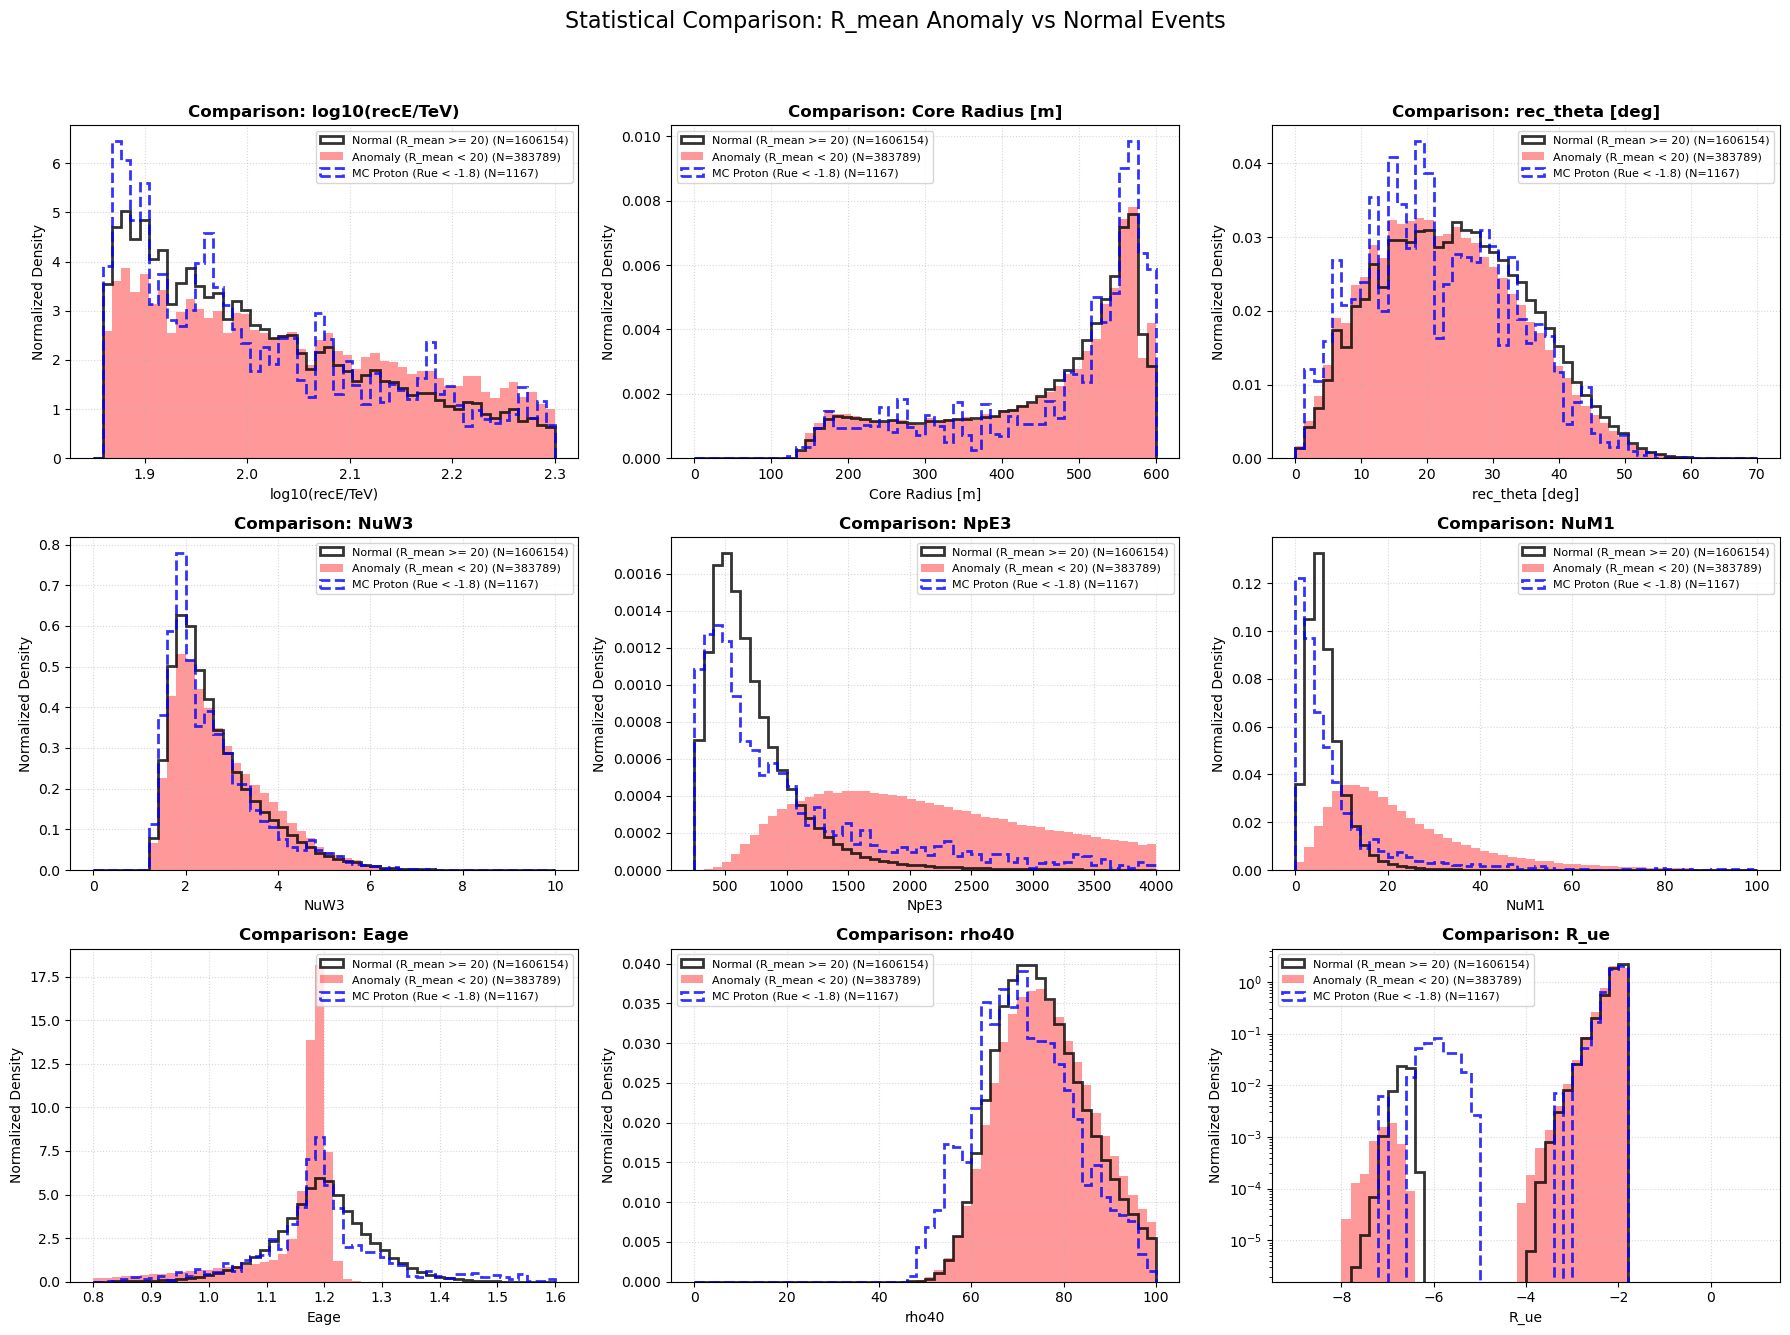

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_anomaly_comparison(df_anomaly, df_normal, df_mc):
    # 1. 定义需要比较的参数、显示范围及标签
    param_configs = {
        'recE':      {'range': (1.85, 2.3), 'label': 'log10(recE/TeV)'},
        'rec_r':     {'range': (0, 600),     'label': 'Core Radius [m]'},
        'rec_theta': {'range': (0, 70),      'label': 'rec_theta [deg]'},
        'NuW3':      {'range':  (0, 10),   'label': 'NuW3'},
        'NpE3':      {'range': (250, 4000),  'label': 'NpE3'},
        'NuM1':      {'range':  (0, 100),   'label': 'NuM1'},
        'Eage':      {'range': (0.8, 1.6),   'label': 'Eage'},
        'rho40':     {'range':  (0, 100),   'label': 'rho40'},
        'R_ue':      {'range': (-9, 1),      'label': 'R_ue'},
        # 'pincness':  {'range':  (0.5, 1),   'label': 'pincness'},
        # 'R_mean':    {'range': (0, 150),     'label': 'R_mean [m]'},
        
        
    }

    # 2. 配置对比组的显示样式
    # 我们将异常事例用红色填充表示，正常事例用黑色线条表示
    comparison_sources = {
        'Normal (R_mean >= 20)': {
            'df': df_normal,
            'color': 'black',
            'style': {'histtype': 'step', 'linewidth': 2, 'alpha': 0.8}
        },
        'Anomaly (R_mean < 20)': {
            'df': df_anomaly,
            'color': 'red',
            'style': {'histtype': 'stepfilled', 'alpha': 0.4}
        },
        'MC Proton (Rue < -1.8)': {
            'df': df_mc,
            'color':"blue",
            'style': {'histtype': 'step', 'alpha': 0.8, 'linestyle': '--', 'linewidth': 2}
        }

    }

    # 3. 准备画布 (根据参数数量动态调整布局，这里 2x3)
    fig, axes = plt.subplots(3, 3, figsize=(18, 14))
    axes = axes.flatten()

    for i, (p_name, cfg) in enumerate(param_configs.items()):
        if i >= len(axes): break
        ax = axes[i]
        
        for name, s in comparison_sources.items():
            if s['df'] is None: continue
            df_sub = s['df']
            if p_name not in df_sub.columns: continue
            
            # --- 核心修正部分 ---
            # 1. 提取并强制转换为 float 类型，忽略无法转换的错误
            raw_data = pd.to_numeric(df_sub[p_name], errors='coerce').values.astype(float)
            
            # 2. 现在可以安全使用 np.isnan 了
            data_to_plot = raw_data[~np.isnan(raw_data)]
            
            if p_name == 'rec_theta':
                data_to_plot = data_to_plot * (180 / np.pi)
            
            # --- 绘图 ---
            w=df_sub['gaisser_weight'].values if 'gaisser_weight' in df_sub.columns else df_sub['weight'].values 
            ax.hist(data_to_plot, bins=50, density=True, weights=w,
                    range=cfg['range'], color=s['color'],
                    label=f"{name} (N={len(data_to_plot)})", 
                    **s['style'])
        if p_name=='R_ue': ax.set_yscale('log')
        ax.set_title(f"Comparison: {cfg['label']}", fontweight='bold')
        ax.set_xlabel(cfg['label'])
        ax.set_ylabel("Normalized Density")
        ax.legend(fontsize='8', loc='best')
        ax.grid(True, linestyle=':', alpha=0.5)

    plt.suptitle("Statistical Comparison: R_mean Anomaly vs Normal Events", fontsize=16, y=0.98)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# --- 调用比较函数 ---
plot_anomaly_comparison(df_Rmean_anomaly, df_Rmean_normal, mc_df[mc_df['R_ue']<-1.9])


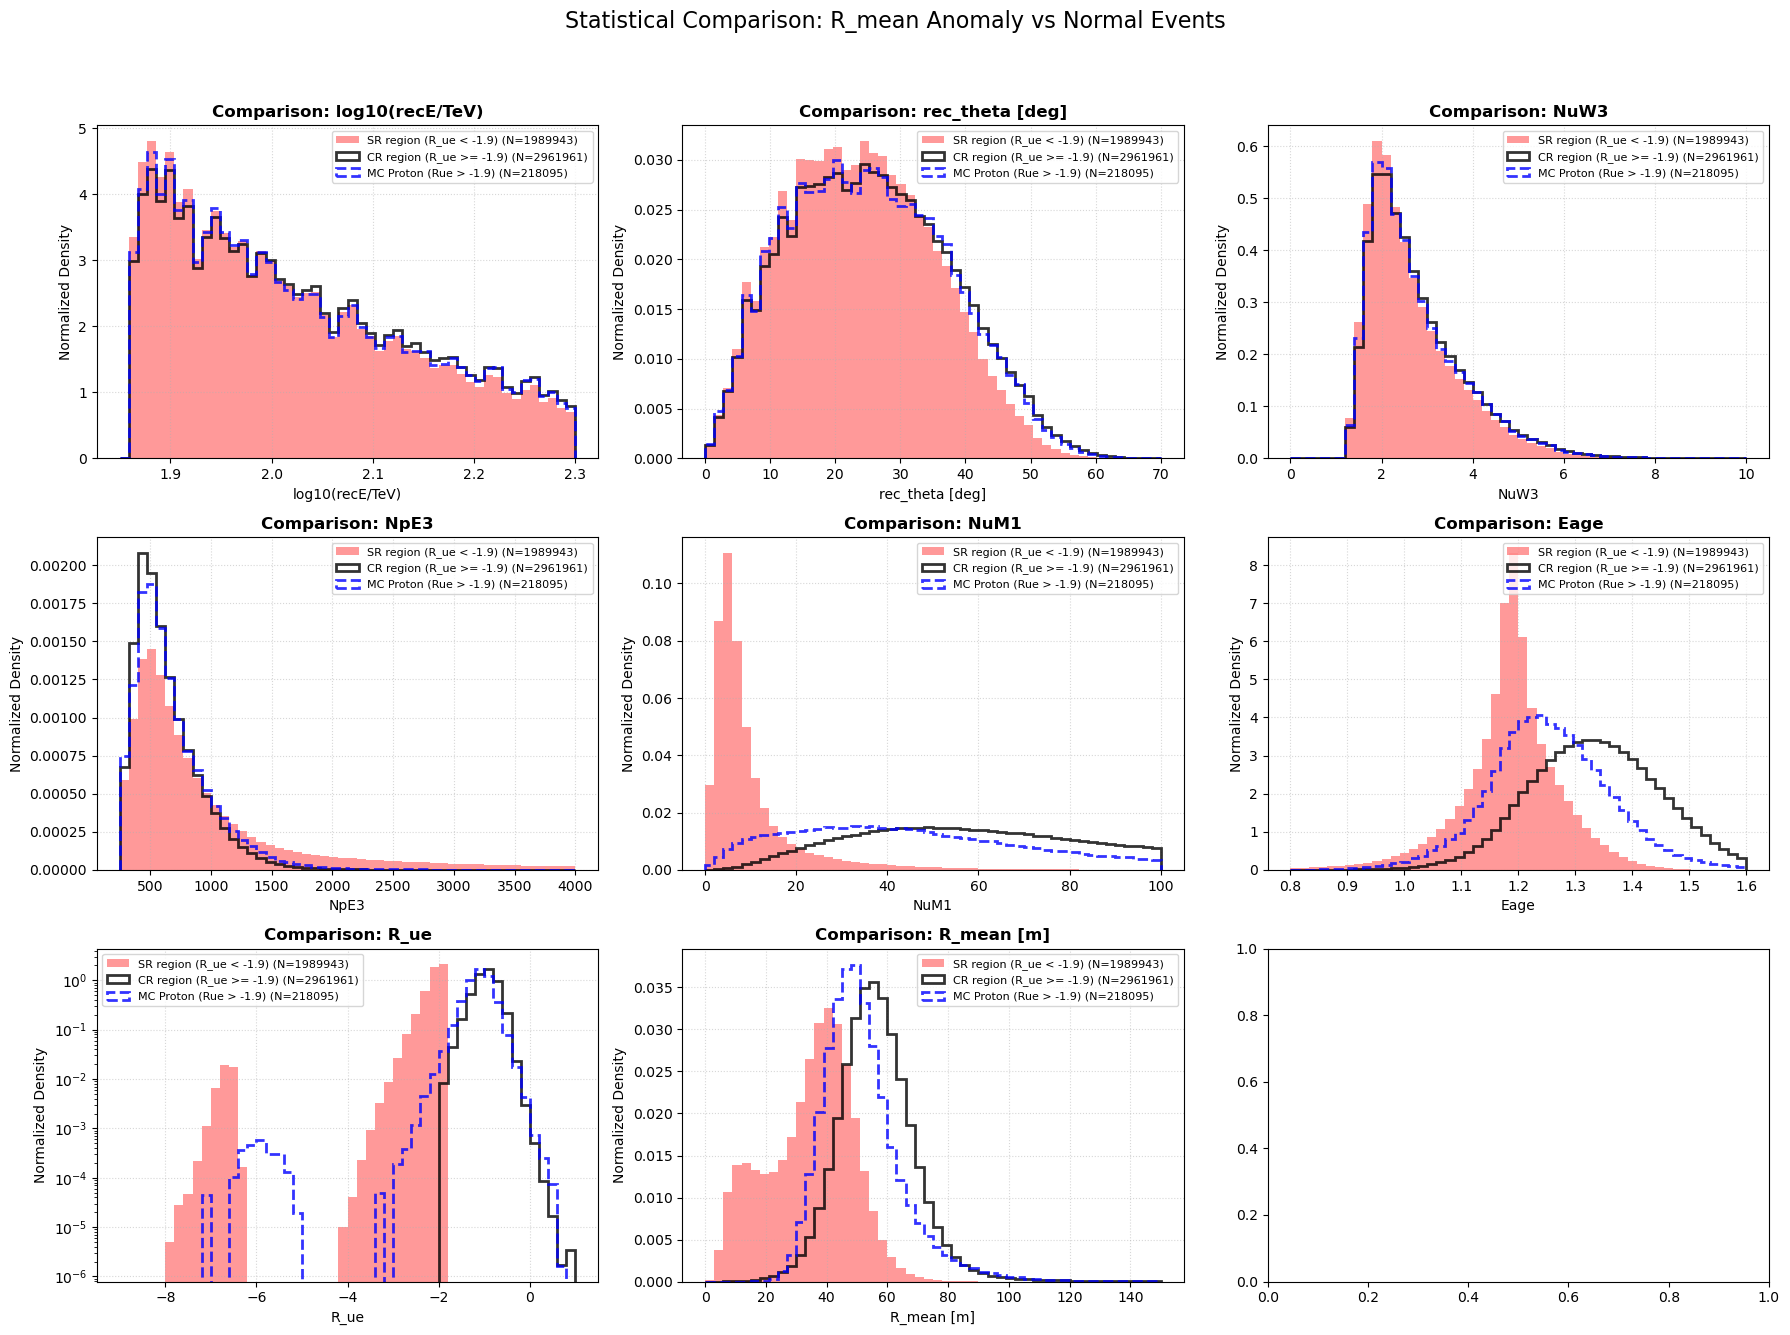

In [12]:
def plot_anomaly_comparison(df_anomaly, df_normal, df_mc):
    # 1. 定义需要比较的参数、显示范围及标签
    param_configs = {
        'recE':      {'range': (1.85, 2.3), 'label': 'log10(recE/TeV)'},
        # 'rec_r':     {'range': (0, 600),     'label': 'Core Radius [m]'},
        'rec_theta': {'range': (0, 70),      'label': 'rec_theta [deg]'},
        'NuW3':      {'range':  (0, 10),   'label': 'NuW3'},
        'NpE3':      {'range': (250, 4000),  'label': 'NpE3'},
        'NuM1':      {'range':  (0, 100),   'label': 'NuM1'},
        'Eage':      {'range': (0.8, 1.6),   'label': 'Eage'},
        # 'rho40':     {'range':  (0, 100),   'label': 'rho40'},
        'R_ue':      {'range': (-9, 1),      'label': 'R_ue'},
        # 'pincness':  {'range':  (0.5, 1),   'label': 'pincness'},
        'R_mean':    {'range': (0, 150),     'label': 'R_mean [m]'},
        
        
    }

    # 2. 配置对比组的显示样式
    # 我们将异常事例用红色填充表示，正常事例用黑色线条表示
    comparison_sources = {
        'SR region (R_ue < -1.9)': {
            'df': df_anomaly,
            'color': 'red',
            'style': {'histtype': 'stepfilled', 'linewidth': 2, 'alpha': 0.4}
        },
        'CR region (R_ue >= -1.9)': {
            'df': df_normal,
            'color': 'black',
            'style': {'histtype': 'step', 'alpha': 0.8, 'linewidth': 2}
        },
        'MC Proton (Rue > -1.9)': {
            'df': df_mc,
            'color':"blue",
            'style': {'histtype': 'step', 'alpha': 0.8, 'linestyle': '--', 'linewidth': 2}
        }

    }

    # 3. 准备画布 (根据参数数量动态调整布局，这里 2x3)
    fig, axes = plt.subplots(3, 3, figsize=(18, 14))
    axes = axes.flatten()

    for i, (p_name, cfg) in enumerate(param_configs.items()):
        if i >= len(axes): break
        ax = axes[i]
        
        for name, s in comparison_sources.items():
            if s['df'] is None: continue
            df_sub = s['df']
            if p_name not in df_sub.columns: continue
            
            # --- 核心修正部分 ---
            # 1. 提取并强制转换为 float 类型，忽略无法转换的错误
            raw_data = pd.to_numeric(df_sub[p_name], errors='coerce').values.astype(float)
            
            # 2. 现在可以安全使用 np.isnan 了
            data_to_plot = raw_data[~np.isnan(raw_data)]
            
            if p_name == 'rec_theta':
                data_to_plot = data_to_plot * (180 / np.pi)
            
            # --- 绘图 ---
            w=df_sub['gaisser_weight'].values if 'gaisser_weight' in df_sub.columns else df_sub['weight'].values 
            ax.hist(data_to_plot, bins=50, density=True, weights=w,
                    range=cfg['range'], color=s['color'],
                    label=f"{name} (N={len(data_to_plot)})", 
                    **s['style'])
        if p_name=='R_ue': ax.set_yscale('log')
        ax.set_title(f"Comparison: {cfg['label']}", fontweight='bold')
        ax.set_xlabel(cfg['label'])
        ax.set_ylabel("Normalized Density")
        ax.legend(fontsize='8', loc='best')
        ax.grid(True, linestyle=':', alpha=0.5)

    plt.suptitle("Statistical Comparison: R_mean Anomaly vs Normal Events", fontsize=16, y=0.98)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

plot_anomaly_comparison(df, one_day_data[one_day_data['R_ue']>-1.9], mc_df)


In [14]:
def estimate_rue_uncertainty(df_data, df_mc, rue_range=(-1.9, -0.5)):
    """
    通过比较 Data 和 MC 在控制区的均值差异来估计系统误差
    """
    # 1. 选定一个纯背景的控制区 (Sideband)
    cond_data = (df_data['R_ue'] > rue_range[0]) & (df_data['R_ue'] < rue_range[1])
    cond_mc = (df_mc['R_ue'] > rue_range[0]) & (df_mc['R_ue'] < rue_range[1])
    
    # 2. 计算均值
    mean_data = df_data[cond_data]['R_ue'].mean()
    mean_mc = df_mc[cond_mc]['R_ue'].mean()
    
    # 3. 计算差异
    diff = abs(mean_data - mean_mc)
    
    print(f"--- Rue Uncertainty Estimation ---")
    print(f"Range: {rue_range}")
    print(f"Data Mean: {mean_data:.4f}")
    print(f"MC Mean:   {mean_mc:.4f}")
    print(f"Difference: {diff:.4f}")
    print(f"Recommended UNC_RUE (Diff * 1.5): {diff * 1.5:.4f}")
    
    return diff * 1.5

# 使用你的大范围数据
# 确保 exp_Rue_large 和 pr_large 包含 -6 到 -3 这个范围的数据
recommended_rue_unc = estimate_rue_uncertainty(one_day_data, mc_df,)


--- Rue Uncertainty Estimation ---
Range: (-1.9, -0.5)
Data Mean: -0.9731
MC Mean:   -1.0760
Difference: 0.1029
Recommended UNC_RUE (Diff * 1.5): 0.1544


Found 383789 events with R_mean < 20


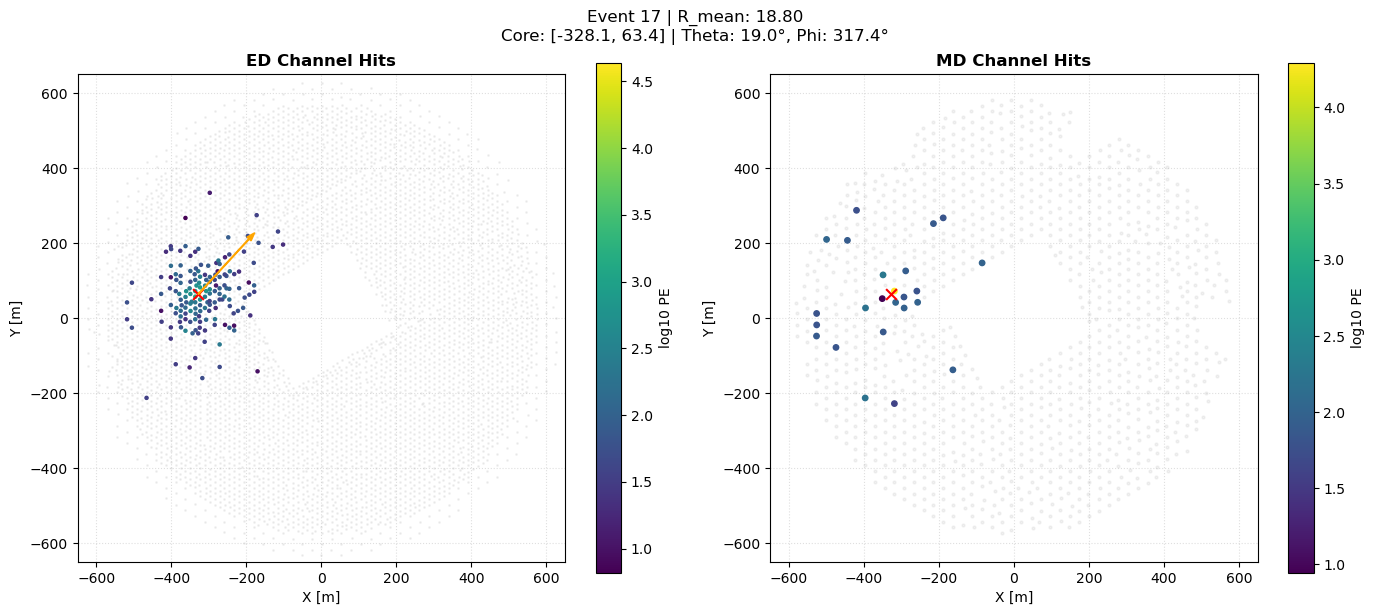

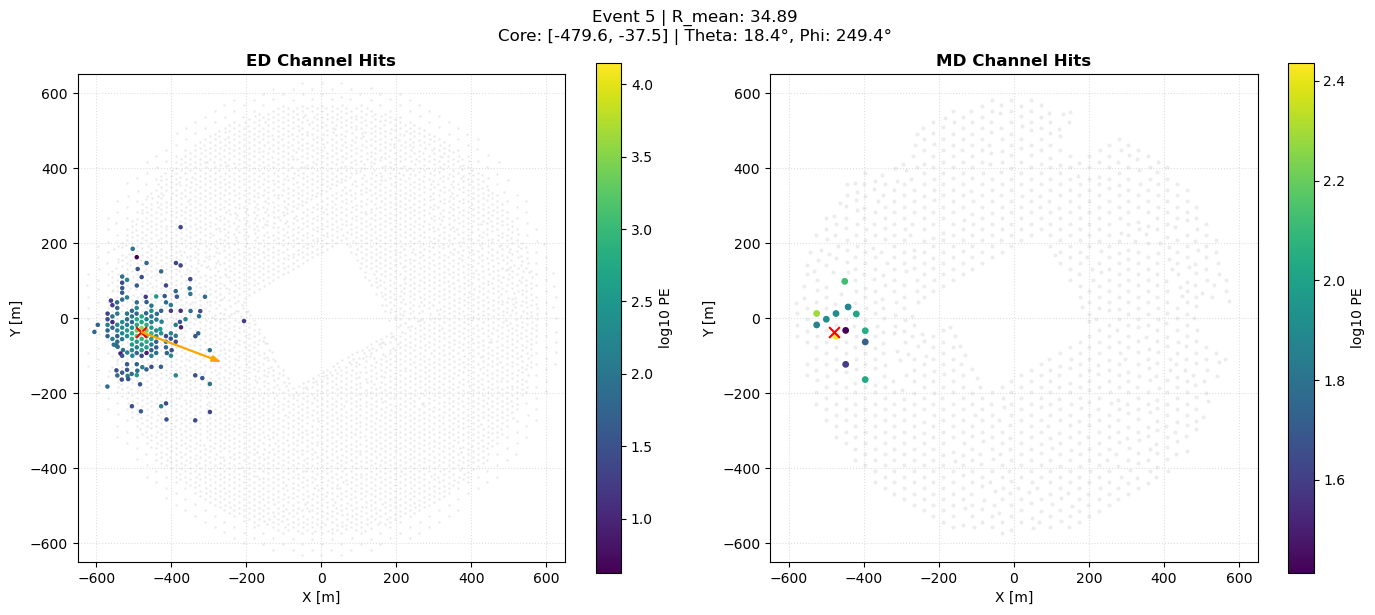

In [30]:


if len(index_anomaly) > 0:
    print(f"Found {len(index_anomaly)} events with R_mean < 20")

target_idx = index_anomaly[1] # 选取第二个异常事例
event_plot_npz(target_idx, hitsE, hitsM, df, flag=20240101)
target_idx = index_normal[4] # 选取第二个异常事例
event_plot_npz(target_idx, hitsE, hitsM, df, flag=20240101)


In [15]:
import numpy as np
import pandas as pd
import uproot
from xgboost import XGBRegressor

# --- 1. 配置参数 ---
BASE_PATH = "/home/zhonghua/data/Dataset_Filted/CosmicRay"
FILES = {
    "proton": "QF_Proton_addweight_rho_2.5e13_5.0e17_V3.root",
    "he":     "QF_He_addweight_rho_2.5e13_5.0e17_V3.root",
    "cno":    "QF_CNO_addweight_rho_2.5e13_5.0e17_V3.root",
    "fe":     "QF_Fe_addweight_rho_2.5e13_5.0e17_V3.root",
    "mgalsi": "QF_MgAlSi_addweight_rho_2.5e13_5.0e17_V3.root"
}

CUTS = (
    "rec_Eage > 0 and Redge > 0 and NuW3 > 0 and NpE3 > 250 "
    "and @theta_cut_low < rec_theta < @theta_cut_high"
)

# 阈值变量
r_cut_low, r_cut_high = 320, 450
theta_cut_low, theta_cut_high = np.deg2rad([10, 30])
log10TeV_low=1.8629710674285889; log10TeV_high=2.2981839179992676

# --- 2. 能量修正模型 ---
model = XGBRegressor()
model.load_model("/home/zhonghua/Filt_Event/recE/models/energy_correction_xgb_NuW3_8-12_higher.json")

# --- 3. 核心处理函数 ---
def process_cosmic_ray(name, filename):
    with uproot.open(f"{BASE_PATH}/{filename}") as f:
        # 读取数据
        branches = ["E", "theta", "phi", "corex", "corey", "rec_x", "rec_y", 
                    "rec_theta", "rec_phi", "rec_Eage", "Redge", "NpE3", "NuM1", "NuW3", "weightGaisser"]
        df = f["Rec"].arrays(branches, library="pd")
        
        print(f"Processing {name}: Entries={len(df)}, Weights={df['weightGaisser'].sum():.2e}")

        # 1. 基础物理筛选
        df = df.query(CUTS).copy()
        
        # 2. 计算特征量
        df["R_ue"] = np.log10((1e-4 + df["NuM1"]) / (df["NpE3"]))
        df["r"] = np.hypot(df['rec_x'], df['rec_y']) # 比 sqrt(x^2+y^2) 更快
        
        # 3. 半径进一步筛选
        df = df[(df["r"] > r_cut_low) & (df["r"] < r_cut_high)]
        df['NuW3'] = np.log10(df['NuW3'])
        # 4. XGBoost 能量修正
        features = df[["NuW3", "rec_theta"]].values
        df["recE"] = model.predict(features)
        
        print(f"     Finished {name}: Remaining Entries={len(df)}")
        return df[(df['recE']>log10TeV_low) & (df['recE']<log10TeV_high)]

# --- 4. 批量执行 ---
dfs = {name: process_cosmic_ray(name, path) for name, path in FILES.items()}

# 如果你需要解包到独立变量（虽然推荐直接用字典 dfs['proton']）
proton_df, he_df, cno_df, fe_df, mgalsi_df = dfs.values()


/home/zhonghua/miniconda3/lib/python3.11/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


Processing proton: Entries=14217778, Weights=1.90e+02
     Finished proton: Remaining Entries=1033493
Processing he: Entries=14210418, Weights=2.03e+02
     Finished he: Remaining Entries=708791
Processing cno: Entries=14218958, Weights=7.65e+01
     Finished cno: Remaining Entries=538073
Processing fe: Entries=14217887, Weights=7.40e+01
     Finished fe: Remaining Entries=446527
Processing mgalsi: Entries=14220016, Weights=3.57e+01
     Finished mgalsi: Remaining Entries=492557


------------------------------
Processing Experimental Data...
Exp Data: 2967854 -> 498740 events (after cuts)
------------------------------
Merging MC Components...
Total MC Events: 1108557
Total MC Flux Weight: 6.20e+00
------------------------------
Calculating Systematics Shifts (Data - MC)...

[recE Shift]
  Mean Data: 2.0258
  Mean MC  : 2.0273
  Shift (Data-MC): -0.0016
  Recommended UNC_E: 0.0016 (or conservative 0.05)

[R_ue Shift]
  Mean Data: -0.9607
  Mean MC  : -0.9145
  Shift (Data-MC): -0.0462
  Recommended UNC_RUE: 0.0462


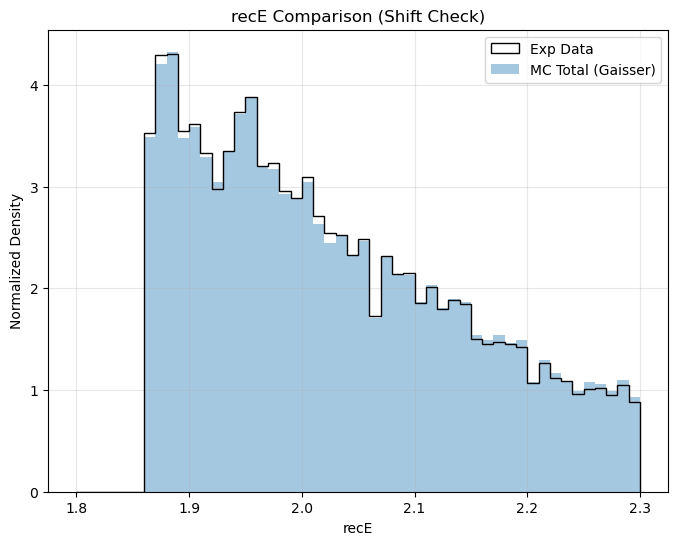

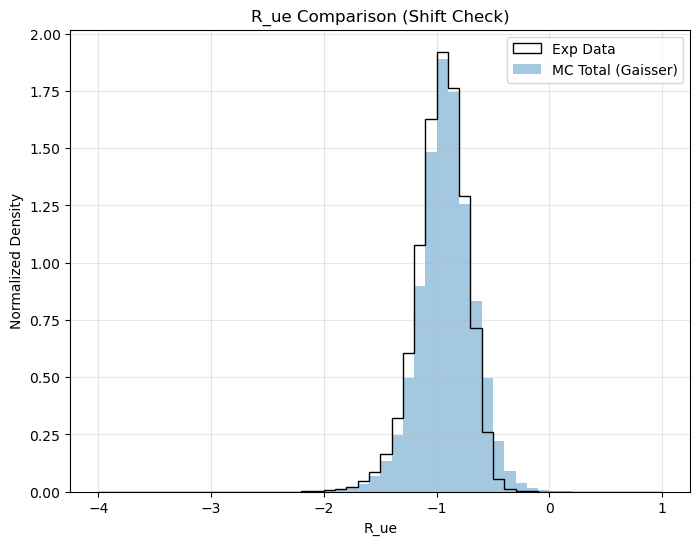

In [18]:
import numpy as np
import pandas as pd

# ==========================================
# 0. 复用之前的配置变量 (确保一致性)
# ==========================================
# 阈值变量
r_cut_low, r_cut_high = 320, 450
theta_cut_low, theta_cut_high = np.deg2rad([10, 30])
log10TeV_low = 1.8629710674285889
log10TeV_high = 2.2981839179992676

# 切选字符串 (注意：NuW3 在 query 时通常是线性的，未取 log 前)
CUTS_QUERY = (
    "rec_Eage > 0 and NuW3 > 0 and NpE3 > 250 "
    "and @theta_cut_low < rec_theta < @theta_cut_high"
)
CUTS_QUERY_exp = (
    "Eage > 0 and NuW3 > 0 and NpE3 > 250 "
    "and @theta_cut_low < rec_theta < @theta_cut_high"
)


# ==========================================
# 1. 处理实验数据 (Apply Same Cuts)
# ==========================================
print("-" * 30)
print("Processing Experimental Data...")

# 1. 复制一份以免修改原数据
exp_df = one_day_data.copy()

# 2. 补充必要的几何变量 (如果 CSV 里没有 r)
# 假设 rec_x, rec_y 存在于 CSV 中
if 'r' not in exp_df.columns:
    exp_df["r"] = np.hypot(exp_df['rec_x'], exp_df['rec_y'])

# 3. 应用基础物理切选 (rec_Eage, Theta, etc.)
# 假设 CSV 列名与 MC 保持一致
before_cut = len(exp_df)
exp_df = exp_df.query(CUTS_QUERY_exp)

# 4. 应用半径切选
exp_df = exp_df[(exp_df["r"] > r_cut_low) & (exp_df["r"] < r_cut_high)]

# 5. 应用能量切选 (recE 已存在于 CSV)
exp_df = exp_df[(exp_df['recE'] > log10TeV_low) & (exp_df['recE'] < log10TeV_high)]

print(f"Exp Data: {before_cut} -> {len(exp_df)} events (after cuts)")

# ==========================================
# 2. 合并 MC 数据 (Weighted Concatenation)
# ==========================================
print("-" * 30)
print("Merging MC Components...")

# 将之前处理好的 5 个 DataFrame 合并
# 假设 dfs 是上一段代码生成的字典
mc_df_list = []
for name, df in dfs.items():
    temp_df = df.copy()
    temp_df['component'] = name  # 标记成分 (可选)
    mc_df_list.append(temp_df)

mc_total = pd.concat(mc_df_list, ignore_index=True)
print(f"Total MC Events: {len(mc_total)}")
print(f"Total MC Flux Weight: {mc_total['weightGaisser'].sum():.2e}")

# ==========================================
# 3. 计算偏移量 (Shift Calculation)
# ==========================================
print("-" * 30)
print("Calculating Systematics Shifts (Data - MC)...")

def get_weighted_stats(values, weights=None):
    """计算加权均值"""
    if weights is None:
        weights = np.ones(len(values))
    
    average = np.average(values, weights=weights)
    # 也可以计算加权标准差用于参考
    variance = np.average((values - average)**2, weights=weights)
    return average, np.sqrt(variance)

# --- A. 计算 recE 的偏移 ---
# Exp (无权重或权重为1)
mu_exp_E, std_exp_E = get_weighted_stats(exp_df['recE'])
# MC (使用 Gaisser 权重)
mu_mc_E, std_mc_E = get_weighted_stats(mc_total['recE'], mc_total['weightGaisser'])

diff_E = mu_exp_E - mu_mc_E
print(f"\n[recE Shift]")
print(f"  Mean Data: {mu_exp_E:.4f}")
print(f"  Mean MC  : {mu_mc_E:.4f}")
print(f"  Shift (Data-MC): {diff_E:.4f}") 
print(f"  Recommended UNC_E: {abs(diff_E):.4f} (or conservative {max(0.05, abs(diff_E)):.2f})")

# --- B. 计算 R_ue 的偏移 ---
# 注意：确保 Data 也是在 CR 区域 (Rue > -2)
# 代码逻辑中 exp_df 已经是 CR 数据了，但为了严谨，我们计算 Shift 时
# 最好限制 MC 也只看 Rue > -2 的部分 (Sideband Comparison)，或者看峰值位置
# 这里我们直接比较整体均值 (假设都在 Background Region)

# 如果想更严谨，取 -4 < Rue < -1.8 这种纯背景区计算
# 这里演示全范围计算（基于前面已经做过的筛选）
mu_exp_R, std_exp_R = get_weighted_stats(exp_df['R_ue'])
mu_mc_R, std_mc_R = get_weighted_stats(mc_total['R_ue'], mc_total['weightGaisser'])

diff_R = mu_exp_R - mu_mc_R
print(f"\n[R_ue Shift]")
print(f"  Mean Data: {mu_exp_R:.4f}")
print(f"  Mean MC  : {mu_mc_R:.4f}")
print(f"  Shift (Data-MC): {diff_R:.4f}")
print(f"  Recommended UNC_RUE: {abs(diff_R):.4f}")

# ==========================================
# 4. 可视化验证 (强烈建议)
# ==========================================
import matplotlib.pyplot as plt

def plot_comparison(var_name, bins, range_val, log=False):
    plt.figure(figsize=(8, 6))
    
    # Plot Exp (Density)
    plt.hist(exp_df[var_name], bins=bins, range=range_val, density=True,
             histtype='step', color='black', label='Exp Data', lw=2)
    
    # Plot MC (Density + Weighted)
    plt.hist(mc_total[var_name], bins=bins, range=range_val, weights=mc_total['weightGaisser'],
             density=True, histtype='stepfilled', alpha=0.4, label='MC Total (Gaisser)')
    
    plt.title(f"{var_name} Comparison (Shift Check)")
    plt.xlabel(var_name)
    plt.ylabel("Normalized Density")
    plt.legend()
    if log: plt.yscale('log')
    plt.grid(alpha=0.3)
    plt.show()

plot_comparison('recE', 50, (1.8, 2.3))
# R_ue 通常看 -4 到 0 的范围
plot_comparison('R_ue', 50, (-4, 1))


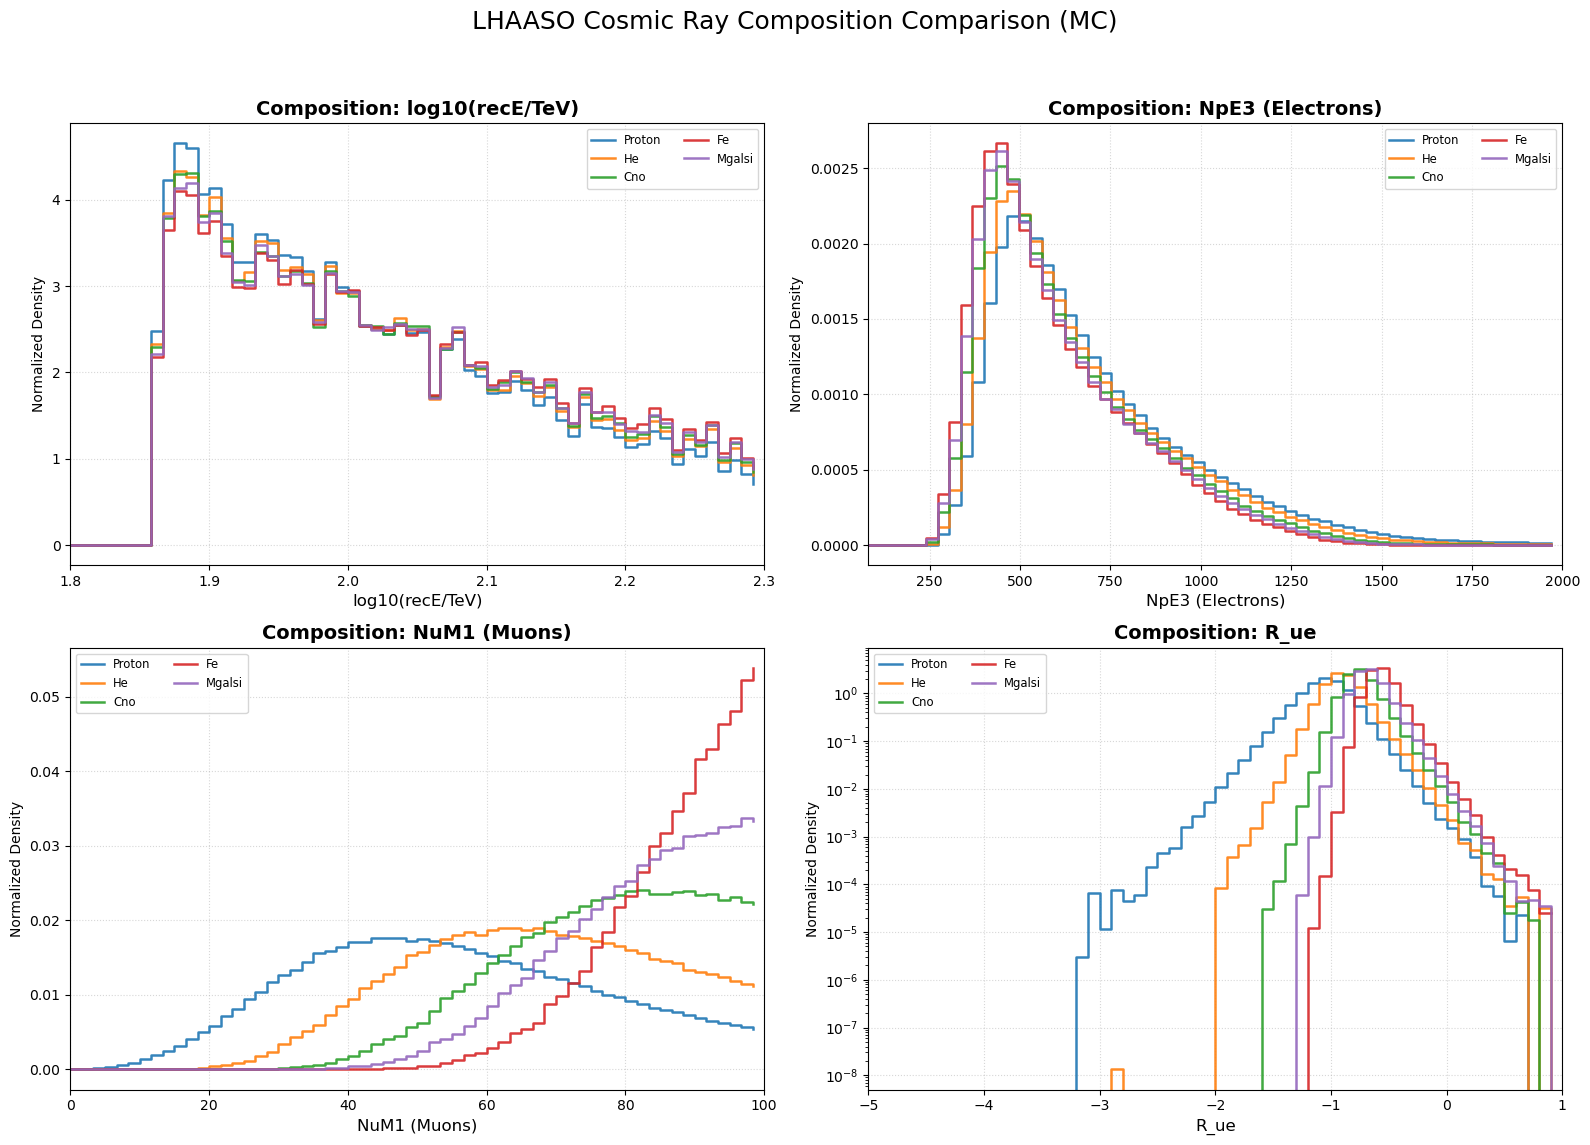

In [17]:
def plot_composition_comparison(dfs, figsize=(16, 12)):
    # 1. 定义要对比的参数配置
    # 这里的 range 可以根据你的数据物理范围微调
    param_configs = {
        "recE":      {"range": (1.8, 2.3),  "log": False, "density": True, "label": "log10(recE/TeV)"},
        "NpE3":      {"range": (80, 2000),  "log": False,  "density": True, "label": "NpE3 (Electrons)"},
        "NuM1":      {"range": (0, 100),    "log": False,  "density": True, "label": "NuM1 (Muons)"},
        "R_ue":      {"range": (-5, 1),     "log": True, "density": True, "label": "R_ue"}
    }

    params = list(param_configs.keys())
    n_params = len(params)
    n_cols = 2
    n_rows = 2
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()
    
    # 定义物种对应的固定颜色，方便对比
    color_map = {
        "proton": "#1f77b4", # 蓝色
        "he":     "#ff7f0e", # 橙色
        "cno":    "#2ca02c", # 绿色
        "mgalsi": "#9467bd", # 紫色
        "fe":     "#d62728"  # 红色
    }

    for idx, p_name in enumerate(params):
        ax = axes[idx]
        cfg = param_configs[p_name]
        
        for name, df in dfs.items():
            if p_name not in df.columns:
                continue
            
            # 使用 NumPy 加速预计算
            vals = df[p_name].values.astype(float)
            weights = df["weightGaisser"].values.astype(float)
            
            # 过滤无效值
            mask = ~np.isnan(vals) & ~np.isinf(vals)
            
            # 计算直方图
            counts, bin_edges = np.histogram(
                vals[mask], bins=60, range=cfg['range'], 
                weights=weights[mask], density=cfg['density']
            )
            
            # 使用 step 绘图
            ax.step(bin_edges[:-1], counts, where='post', 
                    label=name.capitalize(), color=color_map.get(name), 
                    linewidth=1.8, alpha=0.9)

        # 子图美化
        ax.set_title(f"Composition: {cfg['label']}", fontweight='bold', fontsize=14)
        ax.set_xlabel(cfg['label'], fontsize=12)
        ax.set_ylabel("Normalized Density" if cfg['density'] else "Weight Sum")
        
        if cfg['log']:
            ax.set_yscale('log')
        
        ax.grid(True, linestyle=':', alpha=0.5)
        ax.legend(fontsize='small', ncol=2)
        if cfg['range']:
            ax.set_xlim(cfg['range'])

    plt.suptitle("LHAASO Cosmic Ray Composition Comparison (MC)", fontsize=18, y=0.98)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# --- 执行绘图 ---
plot_composition_comparison(dfs)


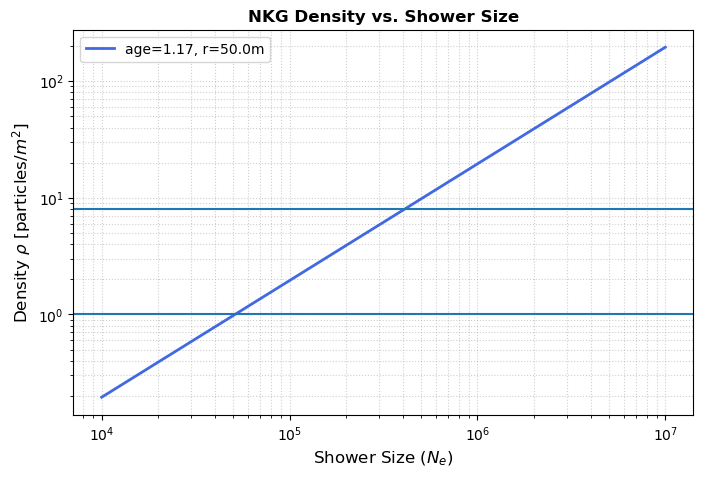

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

def get_nkg_density(age, size, r):
    """
    NKG 密度分布函数
    :param age: 簇射年龄 (Shower age)
    :param size: 总粒子数 (Shower size / Ne)
    :param r: 到簇射核心的距离 [m]
    """
    if age < 0.6 or age > 2.4:
        return -10
    
    rm = 130.0  # Moliere radius
    
    # 计算归一化系数 Cs
    # C(s) = Γ(4.5-s) / [Γ(s) * Γ(4.5-2s)] 
    # 注意：C++ 代码里的 Gamma 参数逻辑需要精确对应
    term1 = gamma(4.5 - age)
    term2 = gamma(age)  # 对应 C++ 的 age - 2.5 + 2.0
    term3 = gamma(4.5 - 2.0 * age) # 对应 C++ 的 4.5 + 2.5 - 2.0 - 2.0*age
    
    cs = term1 / (term2 * term3)
    cs = cs / (2 * np.pi * rm**2)
    
    # 计算密度 rho
    rho = cs * size * (r/rm)**(age - 2) * (1 + r/rm)**(age - 4.5)
    return rho

# --- 设置参数 ---
age_val = 1.17
r_val = 50.0

# 设置 size 的变化范围 (通常 size 是以 10 的幂次变化的，例如 10^4 到 10^7)
sizes = np.logspace(4, 7, 100) 
densities = [get_nkg_density(age_val, s, r_val) for s in sizes]

# --- 绘图 ---
plt.figure(figsize=(8, 5))
plt.plot(sizes, densities, label=f'age={age_val}, r={r_val}m', linewidth=2, color='royalblue')
plt.axhline(1)
plt.axhline(8)
plt.xscale('log') # Size 通常用对数坐标显示
plt.yscale('log') # 密度也常呈现线性增长，对数坐标更清晰
plt.xlabel('Shower Size ($N_e$)', fontsize=12)
plt.ylabel('Density $\\rho$ [particles/$m^2$]', fontsize=12)
plt.title('NKG Density vs. Shower Size', fontweight='bold')
plt.grid(True, which="both", ls=":", alpha=0.6)
plt.legend()

plt.show()
